# Load DataSet

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
{"username":"huseinabdulh","key":"e953505bd13b6491beac8d1916f15533"}

{'username': 'huseinabdulh', 'key': 'e953505bd13b6491beac8d1916f15533'}

In [4]:
#od.download("https://www.kaggle.com/tawsifurrahman/tuberculosis-tb-chest-xray-dataset")

In [5]:
import os
base_dataset = 'C:/Users/ASUS RYZEN/AnacondaJupyter/Skripsi/Model_Skripsi/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database'
class_dir = ['Normal','Tuberculosis']
for class_item in class_dir:
  cur_dir = base_dataset+"/"+class_item
  
  dataset = os.listdir(cur_dir)
  for item in dataset:
    if not item.endswith(".png"):
        os.remove(os.path.join(cur_dir, item))

In [6]:
dataset_awal ='C:/Users/ASUS RYZEN/AnacondaJupyter/Skripsi/Model_Skripsi/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database'


print('Number of classes: {}'.format(len(os.listdir(dataset_awal))))

print('')

normal = len(os.listdir(dataset_awal+'/Normal'))
tbc= len(os.listdir(dataset_awal+'/Tuberculosis'))

print("DATASET AWAL ")
print('Normal : ', normal)
print('TBC : ', tbc)

Number of classes: 2

DATASET AWAL 
Normal :  3500
TBC :  700


In [7]:
import splitfolders

base_dir="C:/Users/ASUS RYZEN/AnacondaJupyter/Skripsi/Model_Skripsi/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database"
data_dir="C:/Users/ASUS RYZEN/AnacondaJupyter/Skripsi/Model_Skripsi/tuberculosis-tb-chest-xray-dataset/DatasetFixed"
splitfolders.ratio(base_dir, output=data_dir, seed=1337, ratio=(.8 ,.1 ,.1),group_prefix=None)

'import splitfolders\n\nbase_dir="C:/Users/ASUS RYZEN/AnacondaJupyter/Skripsi/Model_Skripsi/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database"\ndata_dir="C:/Users/ASUS RYZEN/AnacondaJupyter/Skripsi/Model_Skripsi/tuberculosis-tb-chest-xray-dataset/DatasetFixed"\nsplitfolders.ratio(base_dir, output=data_dir, seed=1337, ratio=(.8 ,.1 ,.1),group_prefix=None)'

In [8]:
cd C:\Users\ASUS RYZEN\AnacondaJupyter\Skripsi\Model_Skripsi\tuberculosis-tb-chest-xray-dataset

C:\Users\ASUS RYZEN\AnacondaJupyter\Skripsi\Model_Skripsi\tuberculosis-tb-chest-xray-dataset


In [9]:
ls

 Volume in drive C is OS
 Volume Serial Number is 70B6-E30C

 Directory of C:\Users\ASUS RYZEN\AnacondaJupyter\Skripsi\Model_Skripsi\tuberculosis-tb-chest-xray-dataset

12/27/2021  08:06 PM    <DIR>          .
12/27/2021  08:06 PM    <DIR>          ..
12/27/2021  08:06 PM    <DIR>          DatasetFixed
12/27/2021  08:05 PM    <DIR>          TB_Chest_Radiography_Database
               0 File(s)              0 bytes
               4 Dir(s)  333,169,483,776 bytes free


In [10]:
#Define a path
base_dir = 'C:/Users/ASUS RYZEN/AnacondaJupyter/Skripsi/Model_Skripsi/tuberculosis-tb-chest-xray-dataset/DatasetFixed'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

train_normal_dir = os.path.join(train_dir, 'Normal')
train_tuber_dir = os.path.join(train_dir, 'Tuberculosis')

validation_normal_dir = os.path.join(validation_dir, 'Normal')
validation_tuber_dir = os.path.join(validation_dir, 'Tuberculosis')

test_normal_dir = os.path.join(test_dir, 'Normal')
test_tuber_dir = os.path.join(test_dir, 'Tuberculosis')

In [11]:
print('Jumlah data train normal :', len(os.listdir(train_normal_dir)))
print('Jumlah data train tuber :',len(os.listdir(train_tuber_dir)))
print()
print('Jumlah data validation normal  :',len(os.listdir(validation_normal_dir)))
print('Jumlah data validation tuber :',len(os.listdir(validation_tuber_dir)))
print('')
print('Jumlah data test normal  :',len(os.listdir(test_normal_dir)))
print('Jumlah data test puber :',len(os.listdir(test_tuber_dir)))

Jumlah data train normal : 2800
Jumlah data train tuber : 560

Jumlah data validation normal  : 350
Jumlah data validation tuber : 70

Jumlah data test normal  : 350
Jumlah data test puber : 70


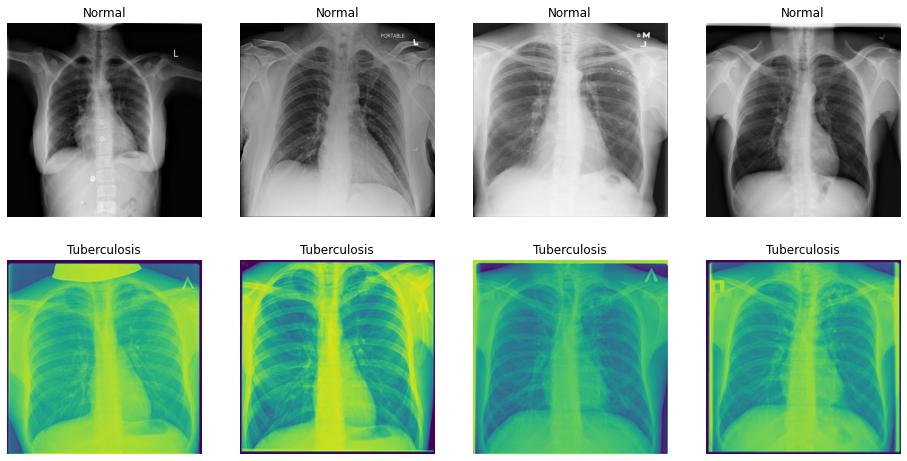

In [12]:
# Tampilkan 8 image per kelas dengan ukuran 4x4 
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 2
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches( ncols * 4,nrows * 4)

pic_index += 8
normal_img = [os.path.join(train_normal_dir, fname) 
                for fname in os.listdir(train_normal_dir)[pic_index-4:pic_index]]
tuberculosis_img  = [os.path.join(train_tuber_dir, fname) 
                for fname in os.listdir(train_tuber_dir)[pic_index-4:pic_index]]

for i, img_path in enumerate(normal_img+tuberculosis_img):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(img_path.split(os.path.sep)[-2])

plt.show()

# Preprocessing

In [13]:
!pip3 install keras
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [14]:
height = 100
width = 100
batch_size = 32

In [15]:
TRAINING_DIR = "C:/Users/ASUS RYZEN/AnacondaJupyter/Skripsi/Model_Skripsi/tuberculosis-tb-chest-xray-dataset/DatasetFixed/train"
VALIDATION_DIR = "C:/Users/ASUS RYZEN/AnacondaJupyter/Skripsi/Model_Skripsi/tuberculosis-tb-chest-xray-dataset/DatasetFixed/val"
TEST_DIR = "C:/Users/ASUS RYZEN/AnacondaJupyter/Skripsi/Model_Skripsi/tuberculosis-tb-chest-xray-dataset/DatasetFixed/test"

In [16]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        TRAINING_DIR,
        target_size=(100, 100),
        batch_size=32,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        VALIDATION_DIR,
        target_size=(100, 100),
        batch_size=32,
        class_mode='categorical')


test_generator = validation_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical')

Found 3360 images belonging to 2 classes.
Found 420 images belonging to 2 classes.
Found 420 images belonging to 2 classes.


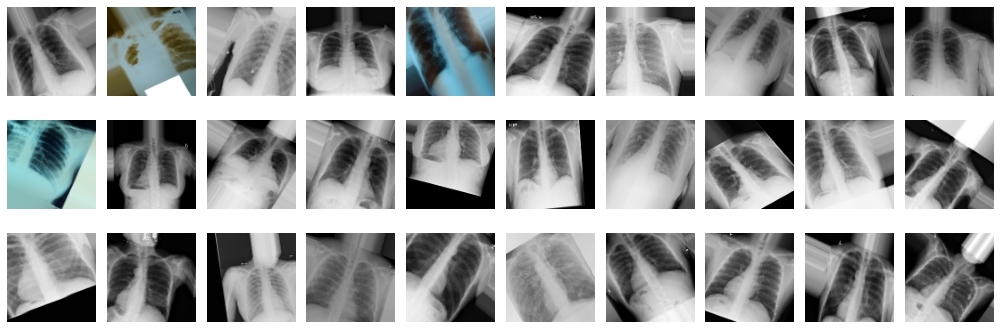

In [17]:
#tampilkan Data Generator
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 8))
for i in range(30):
    plt.subplot(5, 10, i + 1)
    
    for X, y in train_generator:

        plt.imshow(X[0])
        plt.axis("off")
        break
        
plt.tight_layout()
plt.show()

# Modelling

In [18]:
# IMPORT SEMUA PAKET YANG ANDA PERLUKAN UNTUK MENDEFINISIKAN MODEL DISINI
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D,MaxPool2D, MaxPooling2D, GlobalMaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
import time

In [19]:
model = Sequential()
model.add(InputLayer(input_shape=[100,100,3]))

#1
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1, padding='same', activation='elu'))


#2
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1, padding='same', activation='elu'))
model.add(MaxPooling2D(pool_size=2, padding='same'))
model.add(Dropout(0.25))

#3
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=1, padding='same', activation='elu'))


#4
model.add(Conv2D(filters=128, kernel_size=(3,3), strides=1, padding='same', activation='elu'))
model.add(MaxPooling2D(pool_size=2, padding='same'))
model.add(Dropout(0.25))

model.add(GlobalMaxPooling2D())
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(512, activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))

# TULIS CODE UNTUK MENAMPILKAN SUMMARY DARI ARSITEKTUR MODEL ANDA DISINI
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 128)       0

In [20]:
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.001, decay=0.001/32),
              loss='categorical_crossentropy',
              metrics='acc')

In [21]:
H = model.fit(train_generator, epochs=100,validation_data = validation_generator)

Epoch 1/100
105/105 [==============================] - 297s 3s/step - loss: 0.7826 - acc: 0.5721 - val_loss: 0.6478 - val_acc: 0.8476
Epoch 2/100
105/105 [==============================] - 298s 3s/step - loss: 0.5253 - acc: 0.7454 - val_loss: 0.6571 - val_acc: 0.7357
Epoch 3/100
105/105 [==============================] - 308s 3s/step - loss: 0.4010 - acc: 0.8301 - val_loss: 0.5496 - val_acc: 0.8690
Epoch 4/100
105/105 [==============================] - 308s 3s/step - loss: 0.3290 - acc: 0.8759 - val_loss: 0.4447 - val_acc: 0.8929
Epoch 5/100
105/105 [==============================] - 309s 3s/step - loss: 0.3030 - acc: 0.8847 - val_loss: 0.3285 - val_acc: 0.9143
Epoch 6/100
105/105 [==============================] - 310s 3s/step - loss: 0.2753 - acc: 0.8915 - val_loss: 0.2816 - val_acc: 0.9167
Epoch 7/100
105/105 [==============================] - 315s 3s/step - loss: 0.2724 - acc: 0.8915 - val_loss: 0.2568 - val_acc: 0.9167
Epoch 8/100
105/105 [==============================] - 313s 3s

Epoch 62/100
105/105 [==============================] - 309s 3s/step - loss: 0.1651 - acc: 0.9336 - val_loss: 0.1229 - val_acc: 0.9476
Epoch 63/100
105/105 [==============================] - 312s 3s/step - loss: 0.1573 - acc: 0.9382 - val_loss: 0.1300 - val_acc: 0.9452
Epoch 64/100
105/105 [==============================] - 309s 3s/step - loss: 0.1449 - acc: 0.9470 - val_loss: 0.1584 - val_acc: 0.9333
Epoch 65/100
105/105 [==============================] - 309s 3s/step - loss: 0.1480 - acc: 0.9447 - val_loss: 0.1269 - val_acc: 0.9619
Epoch 66/100
105/105 [==============================] - 309s 3s/step - loss: 0.1460 - acc: 0.9432 - val_loss: 0.1297 - val_acc: 0.9405
Epoch 67/100
105/105 [==============================] - 310s 3s/step - loss: 0.1337 - acc: 0.9517 - val_loss: 0.1492 - val_acc: 0.9381
Epoch 68/100
105/105 [==============================] - 309s 3s/step - loss: 0.1449 - acc: 0.9549 - val_loss: 0.1263 - val_acc: 0.9548
Epoch 69/100
105/105 [==============================] -

In [22]:
!pip3 install numpy
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import cv2

In [23]:
import json
from tensorflow.keras.models import load_model
model.save('C:/Users/ASUS RYZEN/AnacondaJupyter/Skripsi/Model_Skripsi/Saved_Model/Model3Elu.h5')

# Plotting

In [24]:
print(H.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


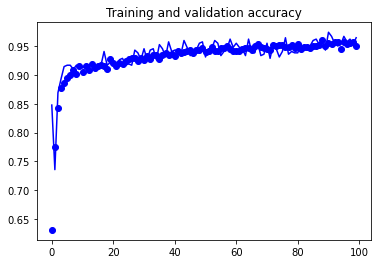

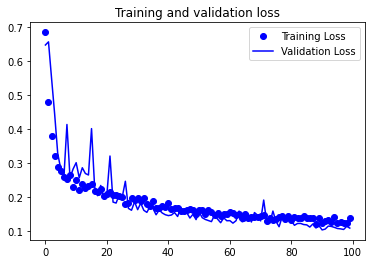

In [25]:
acc = H.history['acc']
val_acc = H.history['val_acc']
loss = H.history['loss']
val_loss = H.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [26]:
#Print Classification Report
#Print the Target names

target_names = []

for key in train_generator.class_indices:
    target_names.append(key)
print(target_names)

['Normal', 'Tuberculosis']


In [27]:
from sklearn.metrics import classification_report
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

C:\Users\ASUS RYZEN\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Classification Report
              precision    recall  f1-score   support

      Normal       0.83      0.86      0.85       350
Tuberculosis       0.14      0.11      0.13        70

    accuracy                           0.74       420
   macro avg       0.49      0.49      0.49       420
weighted avg       0.72      0.74      0.73       420



In [32]:
from sklearn.metrics import classification_report
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

C:\Users\ASUS RYZEN\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Classification Report
              precision    recall  f1-score   support

      Normal       0.97      1.00      0.98       350
Tuberculosis       1.00      0.84      0.91        70

    accuracy                           0.97       420
   macro avg       0.98      0.92      0.95       420
weighted avg       0.97      0.97      0.97       420



In [28]:
datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        shuffle=False,
        class_mode='categorical')

Found 420 images belonging to 2 classes.


In [29]:
import json
from tensorflow.keras.models import load_model
target_dir = 'C:/Users/ASUS RYZEN/AnacondaJupyter/Skripsi/Model_Skripsi/Saved_Model/'
model_saved = load_model(target_dir +'Model3Elu.h5')

In [30]:
test_score = model_saved.evaluate_generator(test_generator, test_generator.batch_size)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])

C:\Users\ASUS RYZEN\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[INFO] accuracy: 97.38%
[INFO] Loss:  0.07674897462129593


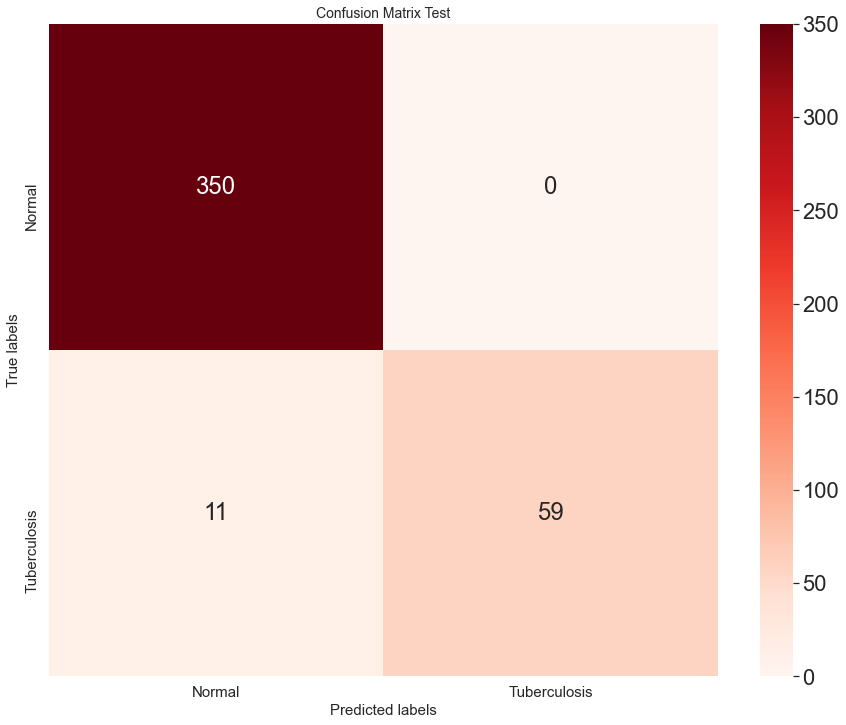

In [33]:
from sklearn.metrics import confusion_matrix
Cmatrix_test = confusion_matrix(test_generator.classes, y_pred)
class_names = test_generator.class_indices

plt.figure(figsize = (15,12))
ax = plt.subplot()
sns.set(font_scale=2.0) # Adjust to fit
sns.heatmap(Cmatrix_test,annot=True, fmt='',ax=ax, cmap=plt.cm.Reds)

# labels, title and ticks
label_font = {'size':'15'}  # Adjust to fit
ax.set_xlabel('Predicted labels', fontdict=label_font)
ax.set_ylabel('True labels', fontdict=label_font) 

title_font = {'size':'18'}  # Adjust to fit
ax.set_title('Confusion Matrix', fontdict=title_font)

ax.tick_params(axis='both', which='major', labelsize=15)  # Adjust to fit
ax.xaxis.set_ticklabels(class_names)   
ax.yaxis.set_ticklabels(class_names)
plt.title('Confusion Matrix Test',fontsize=14)
plt.show()